# Génération de mouvements brownien en Python

### Questions
1. Ecrire une fonction *generate_brownian_motion* qui prend en paramètre:
    - Le nombre de mouvement brownien à générer
    - Le nombre de pas que l'on veut
    - La valeur initiale du mouvement brownien
   Et qui, avec ces paramètres, renvoie une matrice où chaque colonne représente un mouvement brownien.
2. Ecrire une fonction *generate_correlated_brownian_motion* qui renvoie deux mouvements brownien corrélés d'un paramètre $\gamma$ à renseigner.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid", context="talk")

In [11]:
def generate_brownian_motion(draw_number, step, initial_value):
    gaussian = np.random.normal(size=(step, draw_number))
    gaussian[0, :] = initial_value
    
    brownian = gaussian.cumsum(axis=0)
    return brownian

On peut à présent visualiser par exemple cinq mouvements brownien :

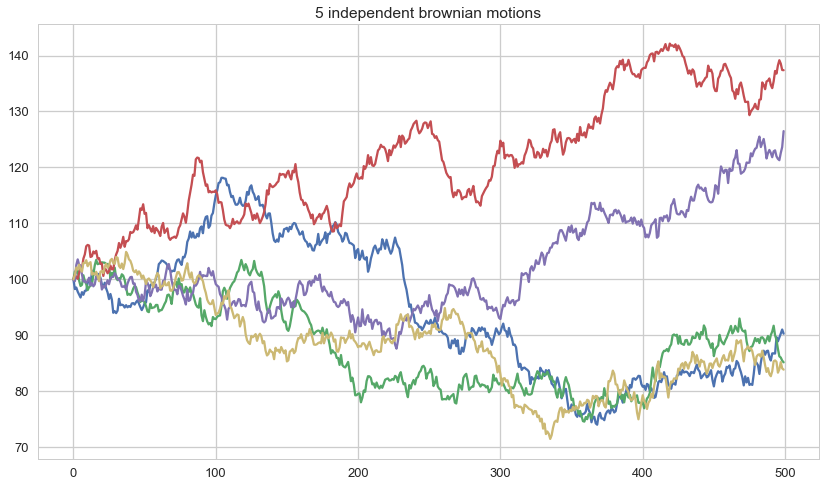

In [15]:
brownian_number = 5

plt.figure(figsize=(14, 8))
brownian = generate_brownian_motion(brownian_number, 500, 100)
plt.plot(brownian)
plt.title("%d independent brownian motions" % brownian_number)
plt.show()

Il s'agit maintenant de renvoyer deux mouvements brownien correlés.

In [13]:
def generate_correlated_brownian_motion(step, initial_value, gamma):
    initial_gaussian = np.random.normal(size=(step, 1))
    initial_gaussian[0, :] = initial_value
    correlated_gaussian = gamma * initial_gaussian + np.sqrt(1 - (gamma**2)) * np.random.normal(size=(step, 1))
    correlated_gaussian[0, :] = initial_value
    
    brownian = initial_gaussian.cumsum(axis=0)
    correlated_brownian = correlated_gaussian.cumsum(axis=0)
    return brownian, correlated_brownian

Visualisons qu'il n'y ait pas d'erreur d'implémentation de manière graphique :

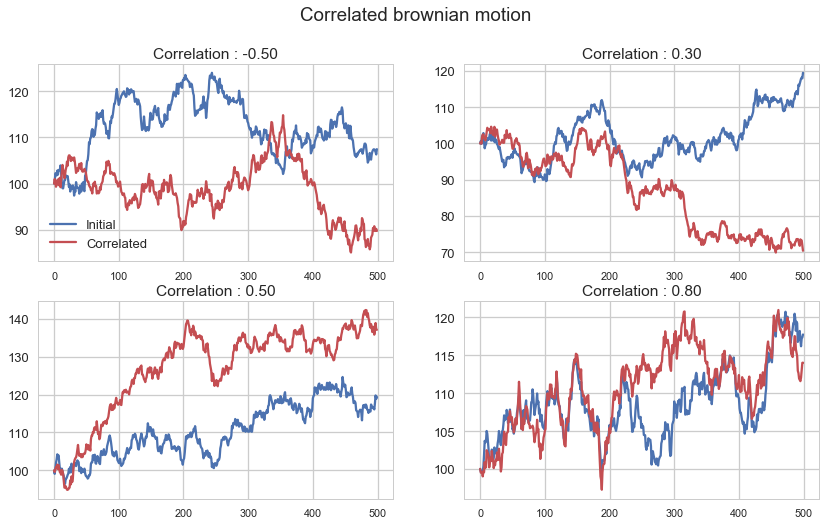

In [14]:
correlations = [-0.5, 0.3, 0.5, 0.8]


plt.figure(figsize=(14, 8))
for index in range(len(correlations)):
    plt.subplot(2, 2, index+1)
    initial, correlated = generate_correlated_brownian_motion(500, 100, correlations[index])

    plt.plot(initial, c=sns.color_palette()[0], label="Initial")
    plt.plot(correlated, c=sns.color_palette()[2], label="Correlated")
    if index == 0:
        plt.legend()
    plt.title("Correlation : %0.2f" % correlations[index])
    plt.xticks(size="x-small")

plt.suptitle("Correlated brownian motion")
plt.show()

### Questions

3. Ecrire deux fonctions *call* et *put* qui renverront une fonction qui correspondra à un call ou un put du point de vue vendeur ou acheteur (paramètre à renseigner). Intégrer les paramètres clés de ces deux instruments.
4. Ecrire une fonction *get_price* qui prendra en paramètre 
    - La valeur initial pour la génération d'un mouvement brownien
    - La fonction payoff qui permet de pricer

In [16]:
def call(strike, premium=0, type="buy"):
    call_function = lambda x: (np.maximum(0, x - strike) - premium) * (1 if type == "buy" else -1)
    return call_function



def put(strike, premium=0, type="buy"):
    put_function = lambda x: (np.maximum(0, strike - x) - premium) * (1 if type == "buy" else -1)
    return put_function

Avec cette implémentation, nous sommes capables de renvoyer n'importe quel combinaison call/put, acheteur/vendeur pour n'importe quel strike et n'importe quel premium. 
Cette fonction nous permettra dans un second temps de calculer directement le payoff que l'on souaite.

In [17]:
def get_price(initial_value, payoff, step=500, draw_number=100):
    brownian = generate_brownian_motion(draw_number=draw_number, step=step, initial_value=initial_value)
    price = np.mean(payoff(brownian[-1, ]))
    print("The price is : €%0.2f" % price)
    return price

Prenons un exemple :

In [19]:
strike = 120
initial_value = 100

payoff = call(strike=strike)
price = get_price(initial_value, payoff)

The price is : €1.93
